In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
path = 'https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/6_gradient_descent/insurance_data.csv?raw=true'
df = pd.read_csv(path)
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


***split train and test set***

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

***Preprocessing: Scale the data so that both age and affordibility are in same scaling range***

In [ ]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scale['age']/100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

**Model Building: First build a model in keras/tensorflow and see what weights and bias values it comes up with. We will than try to reproduce same weights and bias in our plain python implementation of gradient descent**

In [ ]:
model = keras.Sequential([
        keras.layers.Dense(1, input_shape = (2,), activation = 'sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs = 5000)
# model.fit(X_train_scaled, y_train, epochs=5000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 11ms/step - loss: 0.6177 - accuracy: 0.6818
Epoch 2502/5000
1/1 [==============================] - 0s 8ms/step - loss: 0.6177 - accuracy: 0.6818
Epoch 2503/5000
1/1 [==============================] - 0s 6ms/step - loss: 0.6177 - accuracy: 0.6818
Epoch 2504/5000
1/1 [==============================] - 0s 9ms/step - loss: 0.6177 - accuracy: 0.6818
Epoch 2505/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.6177 - accuracy: 0.6818
Epoch 2506/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.6177 - accuracy: 0.6818
Epoch 2507/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.6177 - accuracy: 0.6818
Epoch 2508/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.6177 - accuracy: 0.6818
Epoch 2509/5000
1/1 [==============================] - 0s 5ms/step - loss: 0.6177 - accuracy: 0.6818
Epoch 2510/5000
1/1 [==============================] - 

In [ ]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 109ms/step - loss: 0.9048 - accuracy: 0.5000


[0.9048382639884949, 0.5]

In [ ]:
model.predict(X_test_scaled)

array([[0.97355574],
       [0.8489841 ],
       [0.6371375 ],
       [0.91487575],
       [0.97669536],
       [0.98915493]], dtype=float32)

In [ ]:
y_test

2     1
10    0
21    0
11    0
14    1
9     1
Name: bought_insurance, dtype: int64

**Now get the value of weights and bias from the model**

In [ ]:
coef, intercept = model.get_weights()

In [ ]:
coef, intercept

(array([[6.48021  ],
        [1.6821107]], dtype=float32), array([-1.1218932], dtype=float32))

This means w1=6.48021, w2=1.6821107, bias =-1.1218932

In [ ]:
def sigmoid(x):
        import math
        return 1 / (1 + math.exp(-x))
sigmoid(18)

0.9999999847700205

In [ ]:
X_test

,age,affordibility
2,47,1
10,18,1
21,26,0
11,28,1
14,49,1
9,61,1


Instead of model.predict, write our own prediction function that uses w1,w2 and bias

In [ ]:
def prediction_function(age, affordibility):
  weighted_sum = coef[0]*age + coef[1]*affordibility + intercept
  return sigmoid(weighted_sum)

prediction_function(0.47, 1)

0.973555747793048

In [ ]:
prediction_function(.18, 1)

0.8489840892164036

Now we start implementing gradient descent in plain python. Again the goal is to come up with same w1, w2 and bias that keras model calculated. We want to show how keras/tensorflow would have computed these values internally using gradient descent

First write couple of helper routines such as sigmoid and log_loss

In [ ]:
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [ ]:
def log_loss(y_true, y_predicted):
  epsilon = 1e-15
  y_predicted_new = [max(i, epsilon) for i in y_predicted]
  y_predicted_new = [min(i, 1-epsilon) for i in y_predicted_new]
  y_predicted_new = np.array(y_predicted_new)
  return -np.mean(y_true*np.log(y_predicted_new) + (1-y_true)*np.log(1-y_predicted_new))

All right now comes the time to implement our final gradient descent function !! yay !!!

In [ ]:
def gradient_descent(age, affordibility, y_true, epochs, loss_threshold):
  w1 = w2 = 1
  bias = 0
  rate = 0.5
  n = len(age)
  for i in range(epochs):
    weighted_sum = w1 * age + w2 * affordibility + bias
    y_predicted = sigmoid_numpy(weighted_sum)
    loss = log_loss(y_true, y_predicted)

    w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
    w2d = (1/n)*np.dot(np.transpose(affordibility),(y_predicted-y_true))

    bias_d = np.mean(y_predicted - y_true)
    w1 = w1 - rate * w1d
    w2 = w2 - rate * w2d

    print(f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

    if loss<=loss_threshold:
      break

    return w1, w2, bias 

        



In [ ]:
gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,1000, 0.4631)

Epoch:0, w1:0.9999282232360152, w2:0.971669880620831, bias:0, loss:0.678816168870839


(0.9999282232360152, 0.971669880620831, 0)

In [ ]:
coef, intercept

(array([[6.48021  ],
        [1.6821107]], dtype=float32), array([-1.1218932], dtype=float32))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline
def gradient_descent(x,y):
    m_curr = b_curr = 0
    rate = 0.01
    n = len(x)
    plt.scatter(x,y,color='red',marker='+',linewidth='5')
    for i in range(10000):
        y_predicted = m_curr * x + b_curr
#         print (m_curr,b_curr, i)
        plt.plot(x,y_predicted,color='green')
        md = -(2/n)*sum(x*(y-y_predicted))
        yd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - rate * md
        b_curr = b_curr - rate * yd

In [ ]:
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

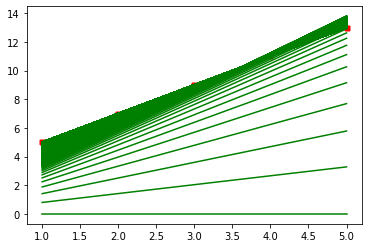

In [ ]:
gradient_descent(x,y)